<a href="https://colab.research.google.com/github/zahraDehghanian97/Adversarially-Learned-Anomaly-Detection/blob/master/AE/AE_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount google drive

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import  Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import matplotlib.gridspec as gridspec
from keras.datasets import mnist
from keras.datasets import cifar10

# **arythmia**

In [21]:
data = scipy.io.loadmat("/content/drive/MyDrive/Colab Notebooks/Adversarially-Learned-Anomaly-Detection/data/arrhythmia.mat")
full_x_data = data["X"]
full_y_data = data['y']
x_train, x_test, y_train, y_test = train_test_split(full_x_data,full_y_data,test_size=0.2,random_state=42)

y_train = y_train.flatten().astype(int)
y_test = y_test.flatten().astype(int)
print("Scaling dataset")
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Scaling dataset


vanila AE

274
Epoch 1/20
3/3 [==============================] - 2s 102ms/step - loss: 0.1562 - val_loss: 0.1595
Epoch 2/20
3/3 [==============================] - 0s 15ms/step - loss: 0.1494 - val_loss: 0.1500
Epoch 3/20
3/3 [==============================] - 0s 15ms/step - loss: 0.1387 - val_loss: 0.1368
Epoch 4/20
3/3 [==============================] - 0s 15ms/step - loss: 0.1245 - val_loss: 0.1207
Epoch 5/20
3/3 [==============================] - 0s 15ms/step - loss: 0.1077 - val_loss: 0.1029
Epoch 6/20
3/3 [==============================] - 0s 16ms/step - loss: 0.0895 - val_loss: 0.0851
Epoch 7/20
3/3 [==============================] - 0s 16ms/step - loss: 0.0720 - val_loss: 0.0690
Epoch 8/20
3/3 [==============================] - 0s 16ms/step - loss: 0.0565 - val_loss: 0.0556
Epoch 9/20
3/3 [==============================] - 0s 15ms/step - loss: 0.0439 - val_loss: 0.0453
Epoch 10/20
3/3 [==============================] - 0s 15ms/step - loss: 0.0341 - val_loss: 0.0377
Epoch 11/20
3/3 [=======

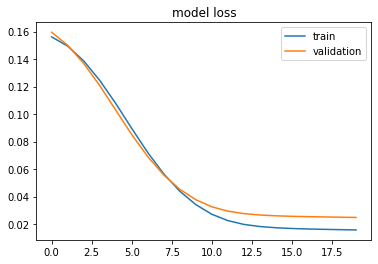

In [22]:
print(x_train.shape[1])
input_size = x_train.shape[1]
input_size = 274
hidden_size = 64
code_size = 8
epochs = 20
batch_size = 128

x = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(x)
h = Dense(code_size,name = "code_layer",activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(h)
r = Dense(input_size, activation='sigmoid')(hidden_2)
# initialize
autoencoder = Model(inputs=x, outputs=r)
intermediate_layer_model = Model(inputs=autoencoder.input,outputs=autoencoder.get_layer('code_layer').output)
autoencoder.compile(optimizer='adam', loss='mse')
SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))
# train
history = autoencoder.fit(x_train, x_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, x_test))
# test
decoded_imgs = autoencoder.predict(x_test)
intermediate_output = intermediate_layer_model.predict(x_test)
print(intermediate_output.shape)
# loss
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


plot histogram z = 8


(452, 274)


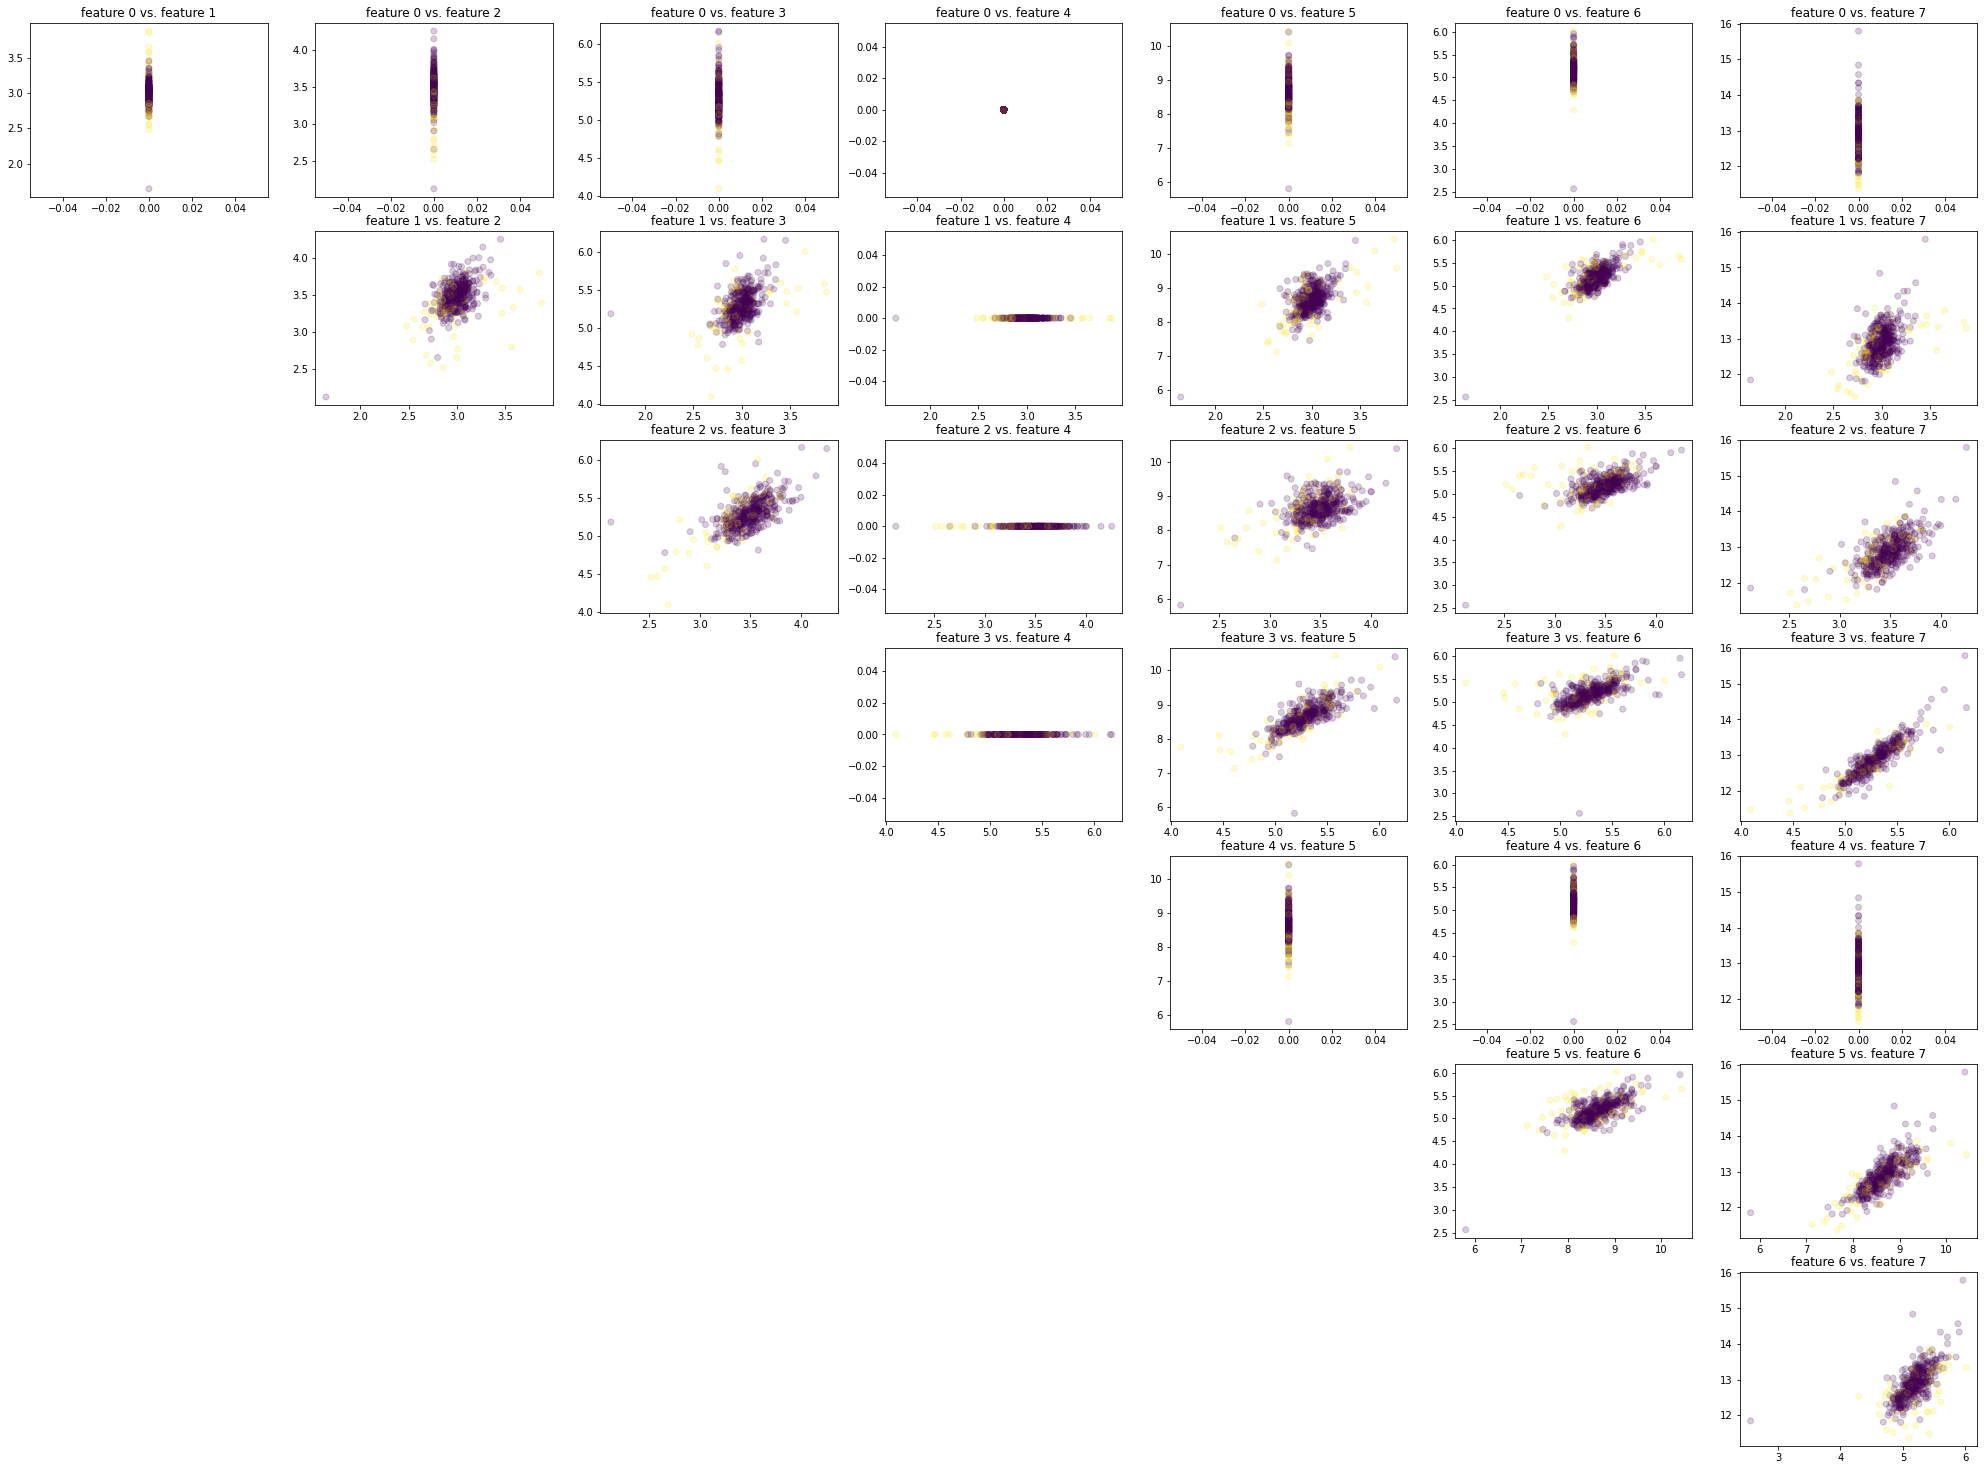

In [23]:

alldata = np.concatenate((x_train,x_test), axis=0)
alllabel = np.concatenate((y_train,y_test))
print(alldata.shape)
code = intermediate_layer_model.predict(alldata)
fig = plt.figure(figsize=(40,30)) 
gs = gridspec.GridSpec(8, 8)
for i in range(code_size) :
  for j in range(i+1,code_size) :
    ax = plt.subplot(gs[i,j])
    ax.set_title("feature "+str(i)+" vs. feature "+str(j))
    ax.scatter(code[:, i], code[:, j], c=alllabel,alpha=0.2)
    fig.add_subplot(ax)
plt.show()


(452, 274)


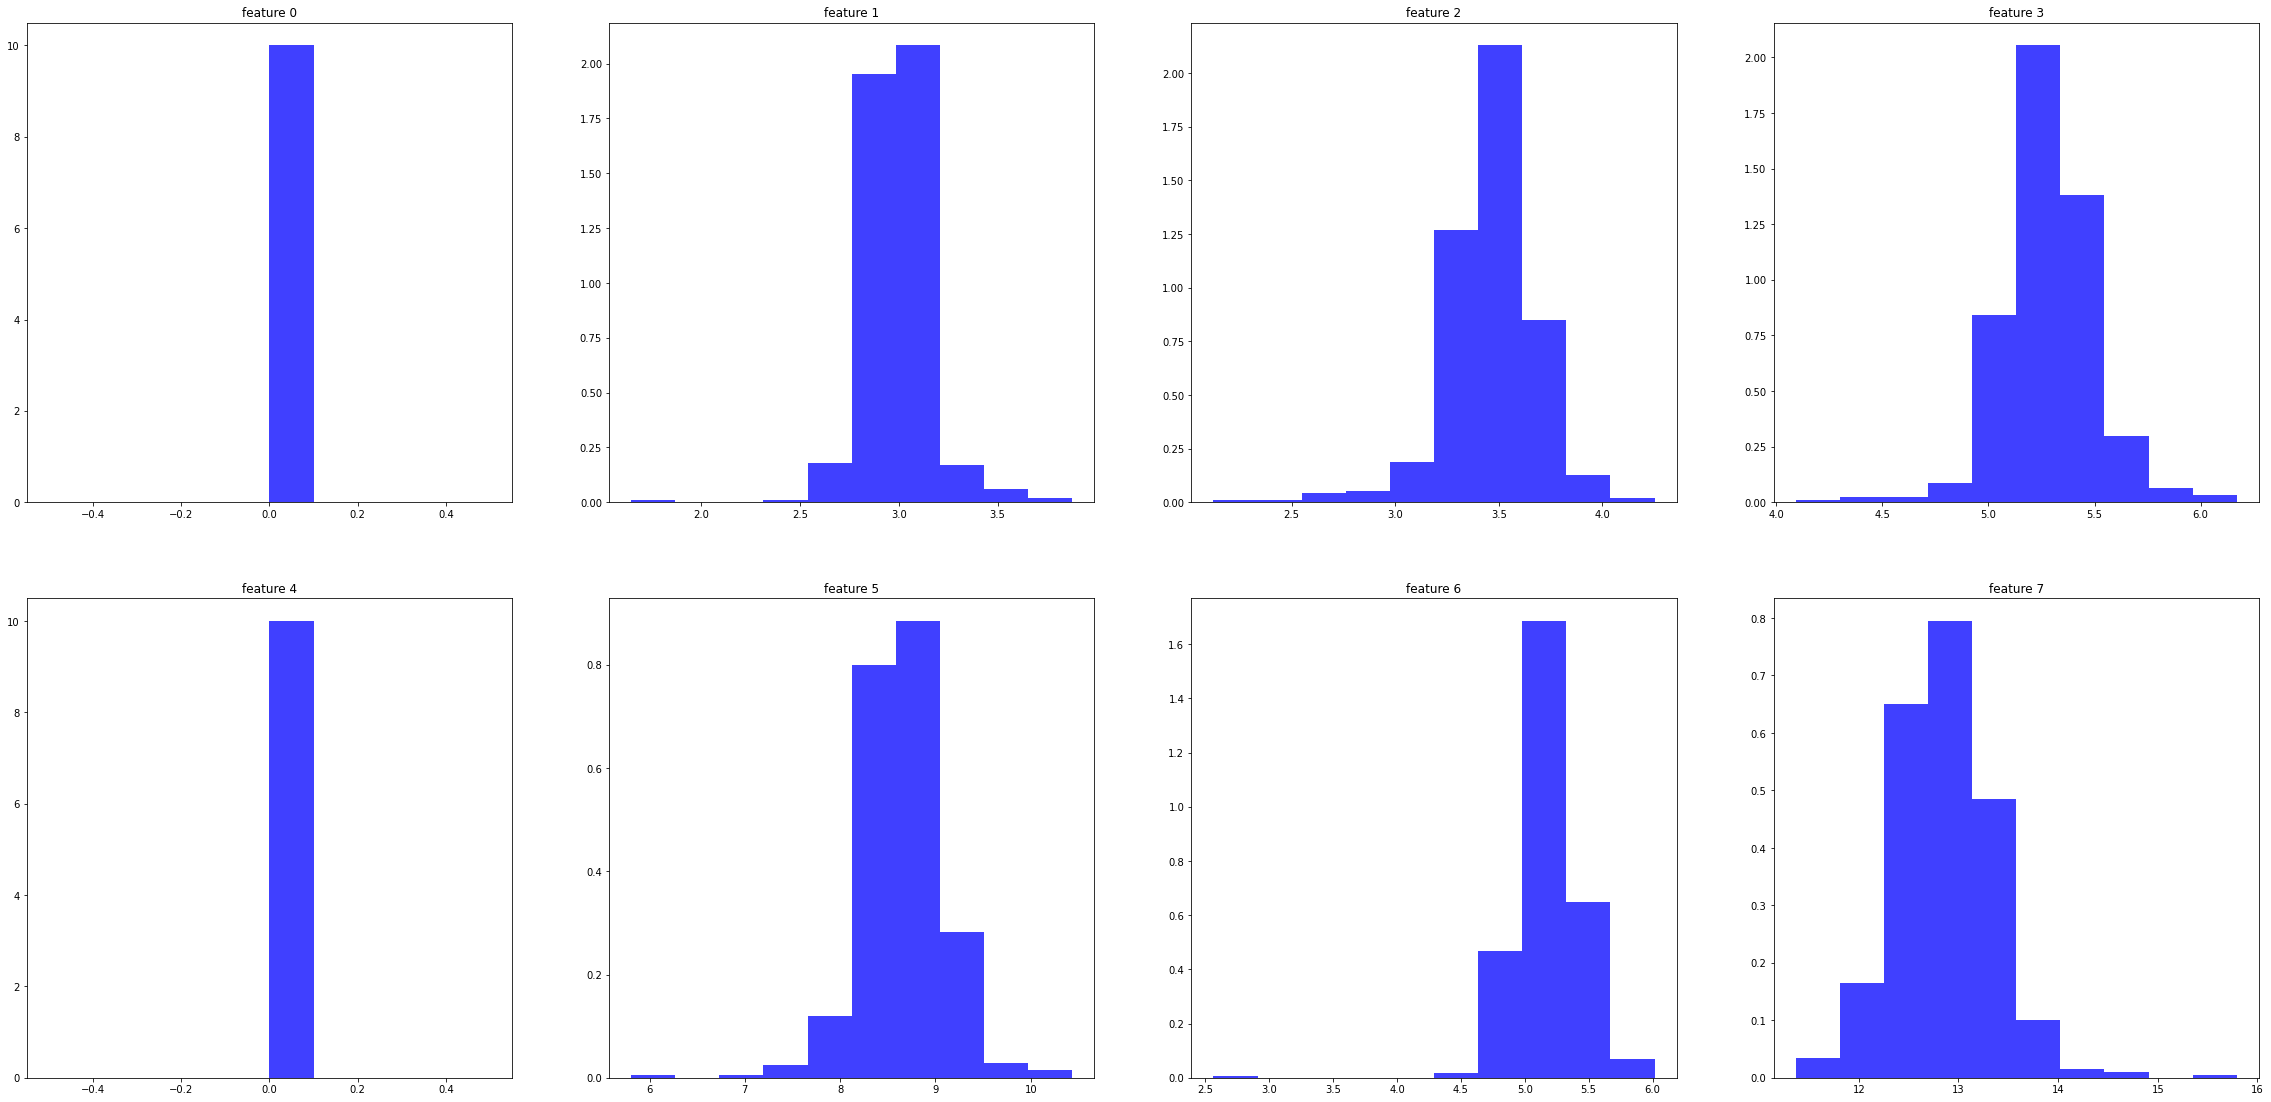

In [24]:
import matplotlib.gridspec as gridspec
alldata = np.concatenate((x_train,x_test), axis=0)
alllabel = np.concatenate((y_train,y_test))
print(alldata.shape)
code = intermediate_layer_model.predict(alldata)
fig = plt.figure(figsize=(40,30)) 
gs = gridspec.GridSpec(int(code_size/4)+1, 4)
for i in range(code_size) :
    ax = plt.subplot(gs[int(i/4),i%4])
    ax.set_title("feature "+str(i))
    ax.hist(code[:, i], 20, density=True, facecolor='b', alpha=0.75)
    fig.add_subplot(ax)
plt.show()

# **Diabetes**

In [25]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


10
Epoch 1/30
3/3 [==============================] - 1s 75ms/step - loss: 0.2506 - val_loss: 0.2527
Epoch 2/30
3/3 [==============================] - 0s 16ms/step - loss: 0.2493 - val_loss: 0.2513
Epoch 3/30
3/3 [==============================] - 0s 17ms/step - loss: 0.2479 - val_loss: 0.2499
Epoch 4/30
3/3 [==============================] - 0s 16ms/step - loss: 0.2464 - val_loss: 0.2485
Epoch 5/30
3/3 [==============================] - 0s 16ms/step - loss: 0.2449 - val_loss: 0.2469
Epoch 6/30
3/3 [==============================] - 0s 16ms/step - loss: 0.2433 - val_loss: 0.2452
Epoch 7/30
3/3 [==============================] - 0s 16ms/step - loss: 0.2416 - val_loss: 0.2434
Epoch 8/30
3/3 [==============================] - 0s 17ms/step - loss: 0.2397 - val_loss: 0.2415
Epoch 9/30
3/3 [==============================] - 0s 16ms/step - loss: 0.2378 - val_loss: 0.2395
Epoch 10/30
3/3 [==============================] - 0s 16ms/step - loss: 0.2358 - val_loss: 0.2374
Epoch 11/30
3/3 [=========

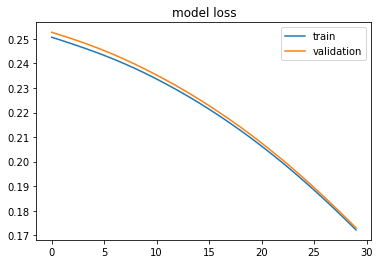

In [26]:
print(x_train.shape[1])
input_size = x_train.shape[1]
input_size = 10
hidden_size = 7
code_size = 4
epochs = 30
batch_size = 128

x = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(x)
h = Dense(code_size,name = "code_layer",activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(h)
r = Dense(input_size, activation='sigmoid')(hidden_2)
# initialize
autoencoder = Model(inputs=x, outputs=r)
intermediate_layer_model = Model(inputs=autoencoder.input,outputs=autoencoder.get_layer('code_layer').output)
autoencoder.compile(optimizer='adam', loss='mse')
# plot
SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))
# train
history = autoencoder.fit(x_train, x_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, x_test))
# test
decoded_imgs = autoencoder.predict(x_test)
intermediate_output = intermediate_layer_model.predict(x_test)
print(intermediate_output.shape)
# loss
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


plot histogram


(442, 10)


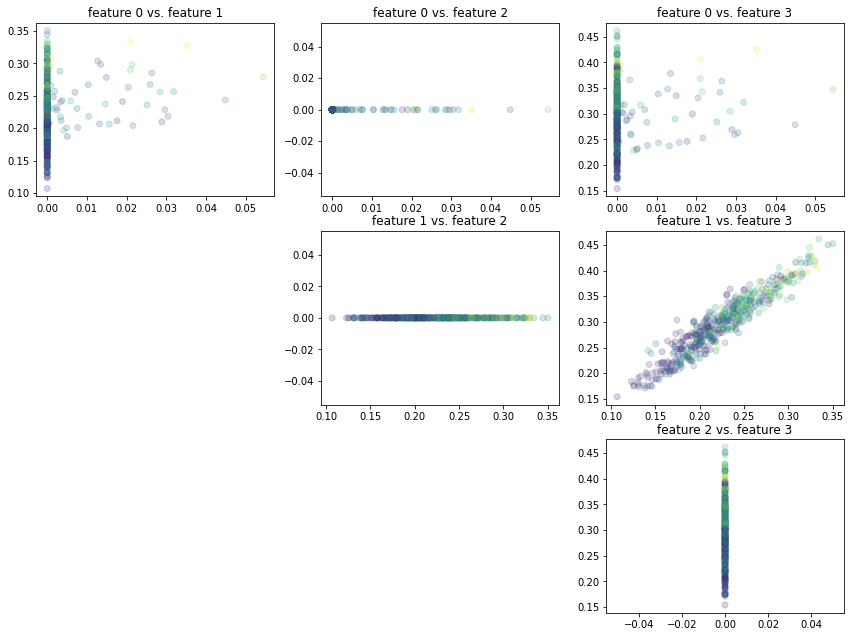

In [27]:
alldata = np.concatenate((x_train,x_test), axis=0)
alllabel = np.concatenate((y_train,y_test))
print(alldata.shape)
code = intermediate_layer_model.predict(alldata)
fig = plt.figure(figsize=(40,30)) 
gs = gridspec.GridSpec(8, 8)
for i in range(code_size) :
  for j in range(i+1,code_size) :
    ax = plt.subplot(gs[i,j])
    ax.set_title("feature "+str(i)+" vs. feature "+str(j))
    ax.scatter(code[:, i], code[:, j], c=alllabel,alpha=0.2)
    fig.add_subplot(ax)
plt.show()


(442, 10)


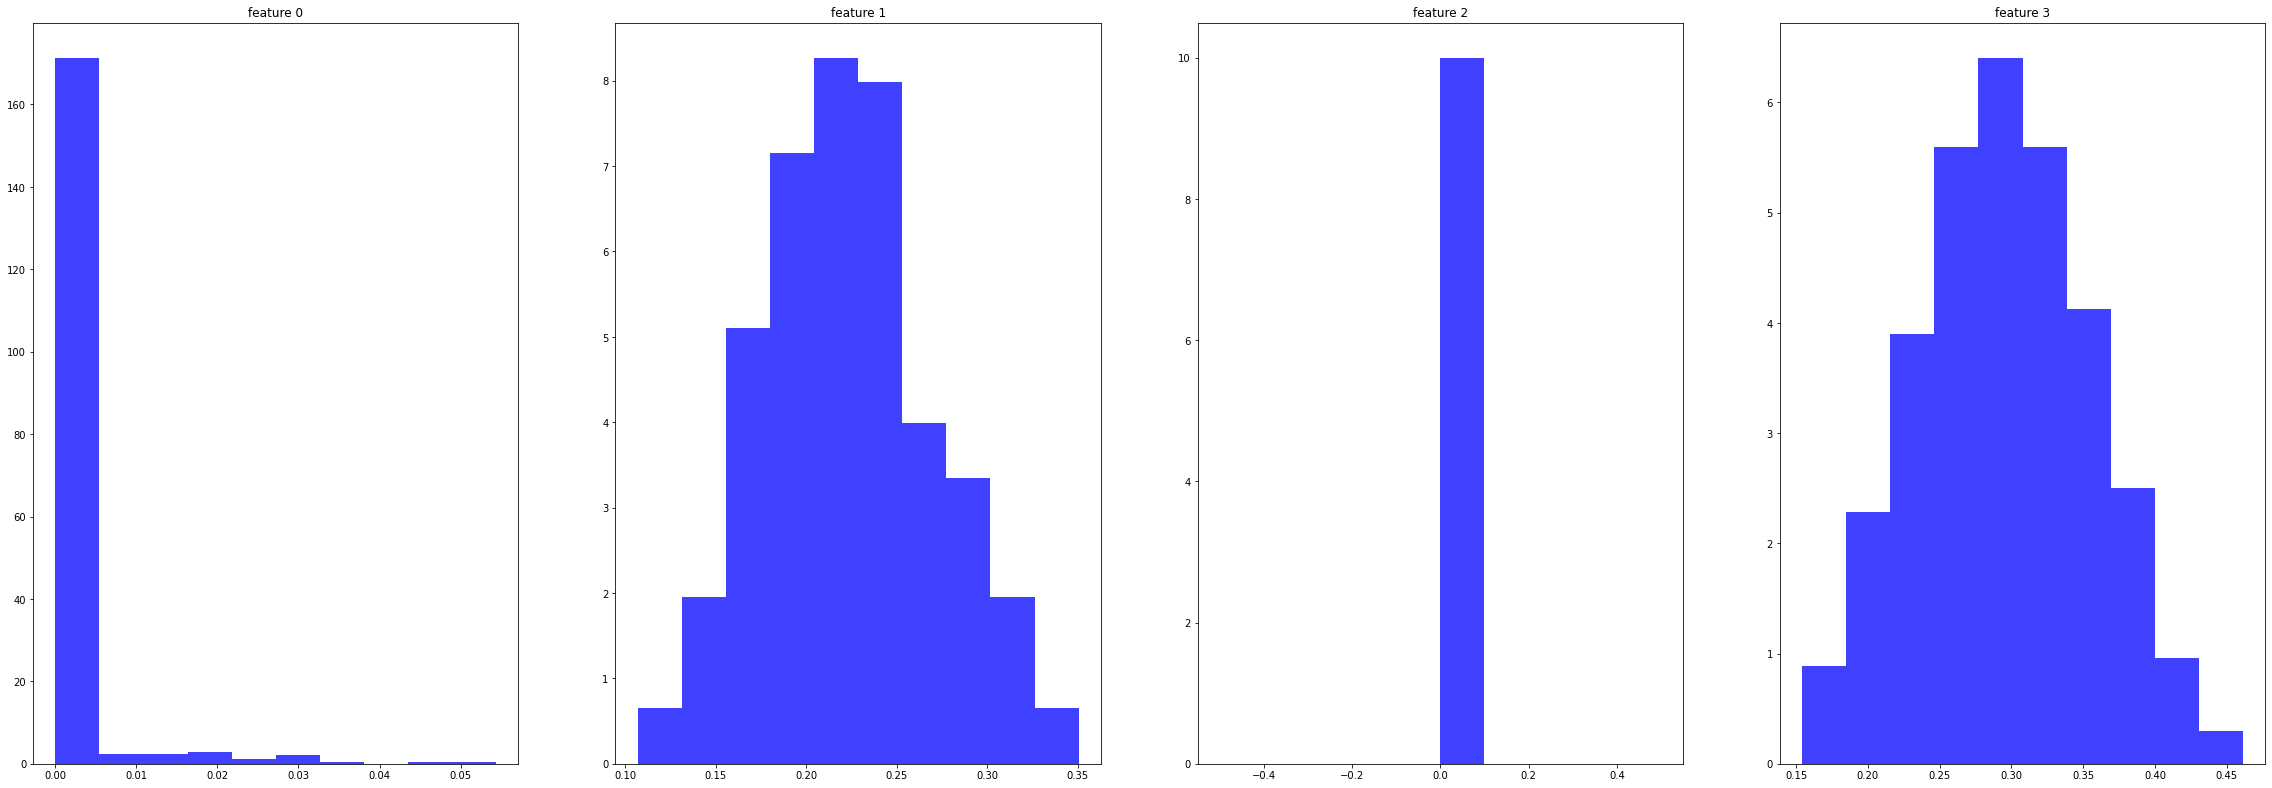

In [28]:
alldata = np.concatenate((x_train,x_test), axis=0)
alllabel = np.concatenate((y_train,y_test))
print(alldata.shape)
code = intermediate_layer_model.predict(alldata)
fig = plt.figure(figsize=(40,30)) 
gs = gridspec.GridSpec(int(code_size/4)+1, 4)
for i in range(code_size) :
    ax = plt.subplot(gs[int(i/4),i%4])
    ax.set_title("feature "+str(i))
    ax.hist(code[:, i], 20, density=True, facecolor='b', alpha=0.75)
    fig.add_subplot(ax)
plt.show()

# **Mnist**

In [43]:

(X_train,Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
x_train = []
x_test = []
y_train = []
y_test = []
for i in range(len(Y_train)):
  if Y_train[i] == 2 :
    x_train.append(X_train[i])
    y_train.append(Y_train[i])
for i in range(len(Y_test)):
  if Y_test[i] == 2 or Y_test[i] == 5:
    x_test.append(X_test[i])
    y_test.append(Y_test[i])
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print((x_train.shape))

(60000, 28, 28)
(5958, 784)


784
Epoch 1/30
47/47 [==============================] - 1s 9ms/step - loss: 0.0960 - val_loss: 0.0746
Epoch 2/30
47/47 [==============================] - 0s 6ms/step - loss: 0.0528 - val_loss: 0.0623
Epoch 3/30
47/47 [==============================] - 0s 6ms/step - loss: 0.0419 - val_loss: 0.0551
Epoch 4/30
47/47 [==============================] - 0s 6ms/step - loss: 0.0358 - val_loss: 0.0499
Epoch 5/30
47/47 [==============================] - 0s 7ms/step - loss: 0.0312 - val_loss: 0.0456
Epoch 6/30
47/47 [==============================] - 0s 6ms/step - loss: 0.0281 - val_loss: 0.0422
Epoch 7/30
47/47 [==============================] - 0s 6ms/step - loss: 0.0259 - val_loss: 0.0395
Epoch 8/30
47/47 [==============================] - 0s 6ms/step - loss: 0.0240 - val_loss: 0.0374
Epoch 9/30
47/47 [==============================] - 0s 7ms/step - loss: 0.0225 - val_loss: 0.0368
Epoch 10/30
47/47 [==============================] - 0s 6ms/step - loss: 0.0214 - val_loss: 0.0355
Epoch 11/30
47/

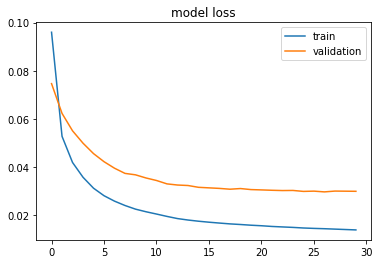

In [45]:
print(x_train.shape[1])
input_size = x_train.shape[1]
hidden_size = 256
code_size = 16
epochs = 30
batch_size = 128

x = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(x)
h = Dense(code_size,name = "code_layer",activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(h)
r = Dense(input_size, activation='sigmoid')(hidden_2)
# initialize
autoencoder = Model(inputs=x, outputs=r)
intermediate_layer_model = Model(inputs=autoencoder.input,outputs=autoencoder.get_layer('code_layer').output)
autoencoder.compile(optimizer='adam', loss='mse')
# plot
SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))
# train
history = autoencoder.fit(x_train, x_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, x_test))
# test
decoded_imgs = autoencoder.predict(x_test)
intermediate_output = intermediate_layer_model.predict(x_test)
print(intermediate_output.shape)
# loss
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()



plot histogram


(7882, 784)


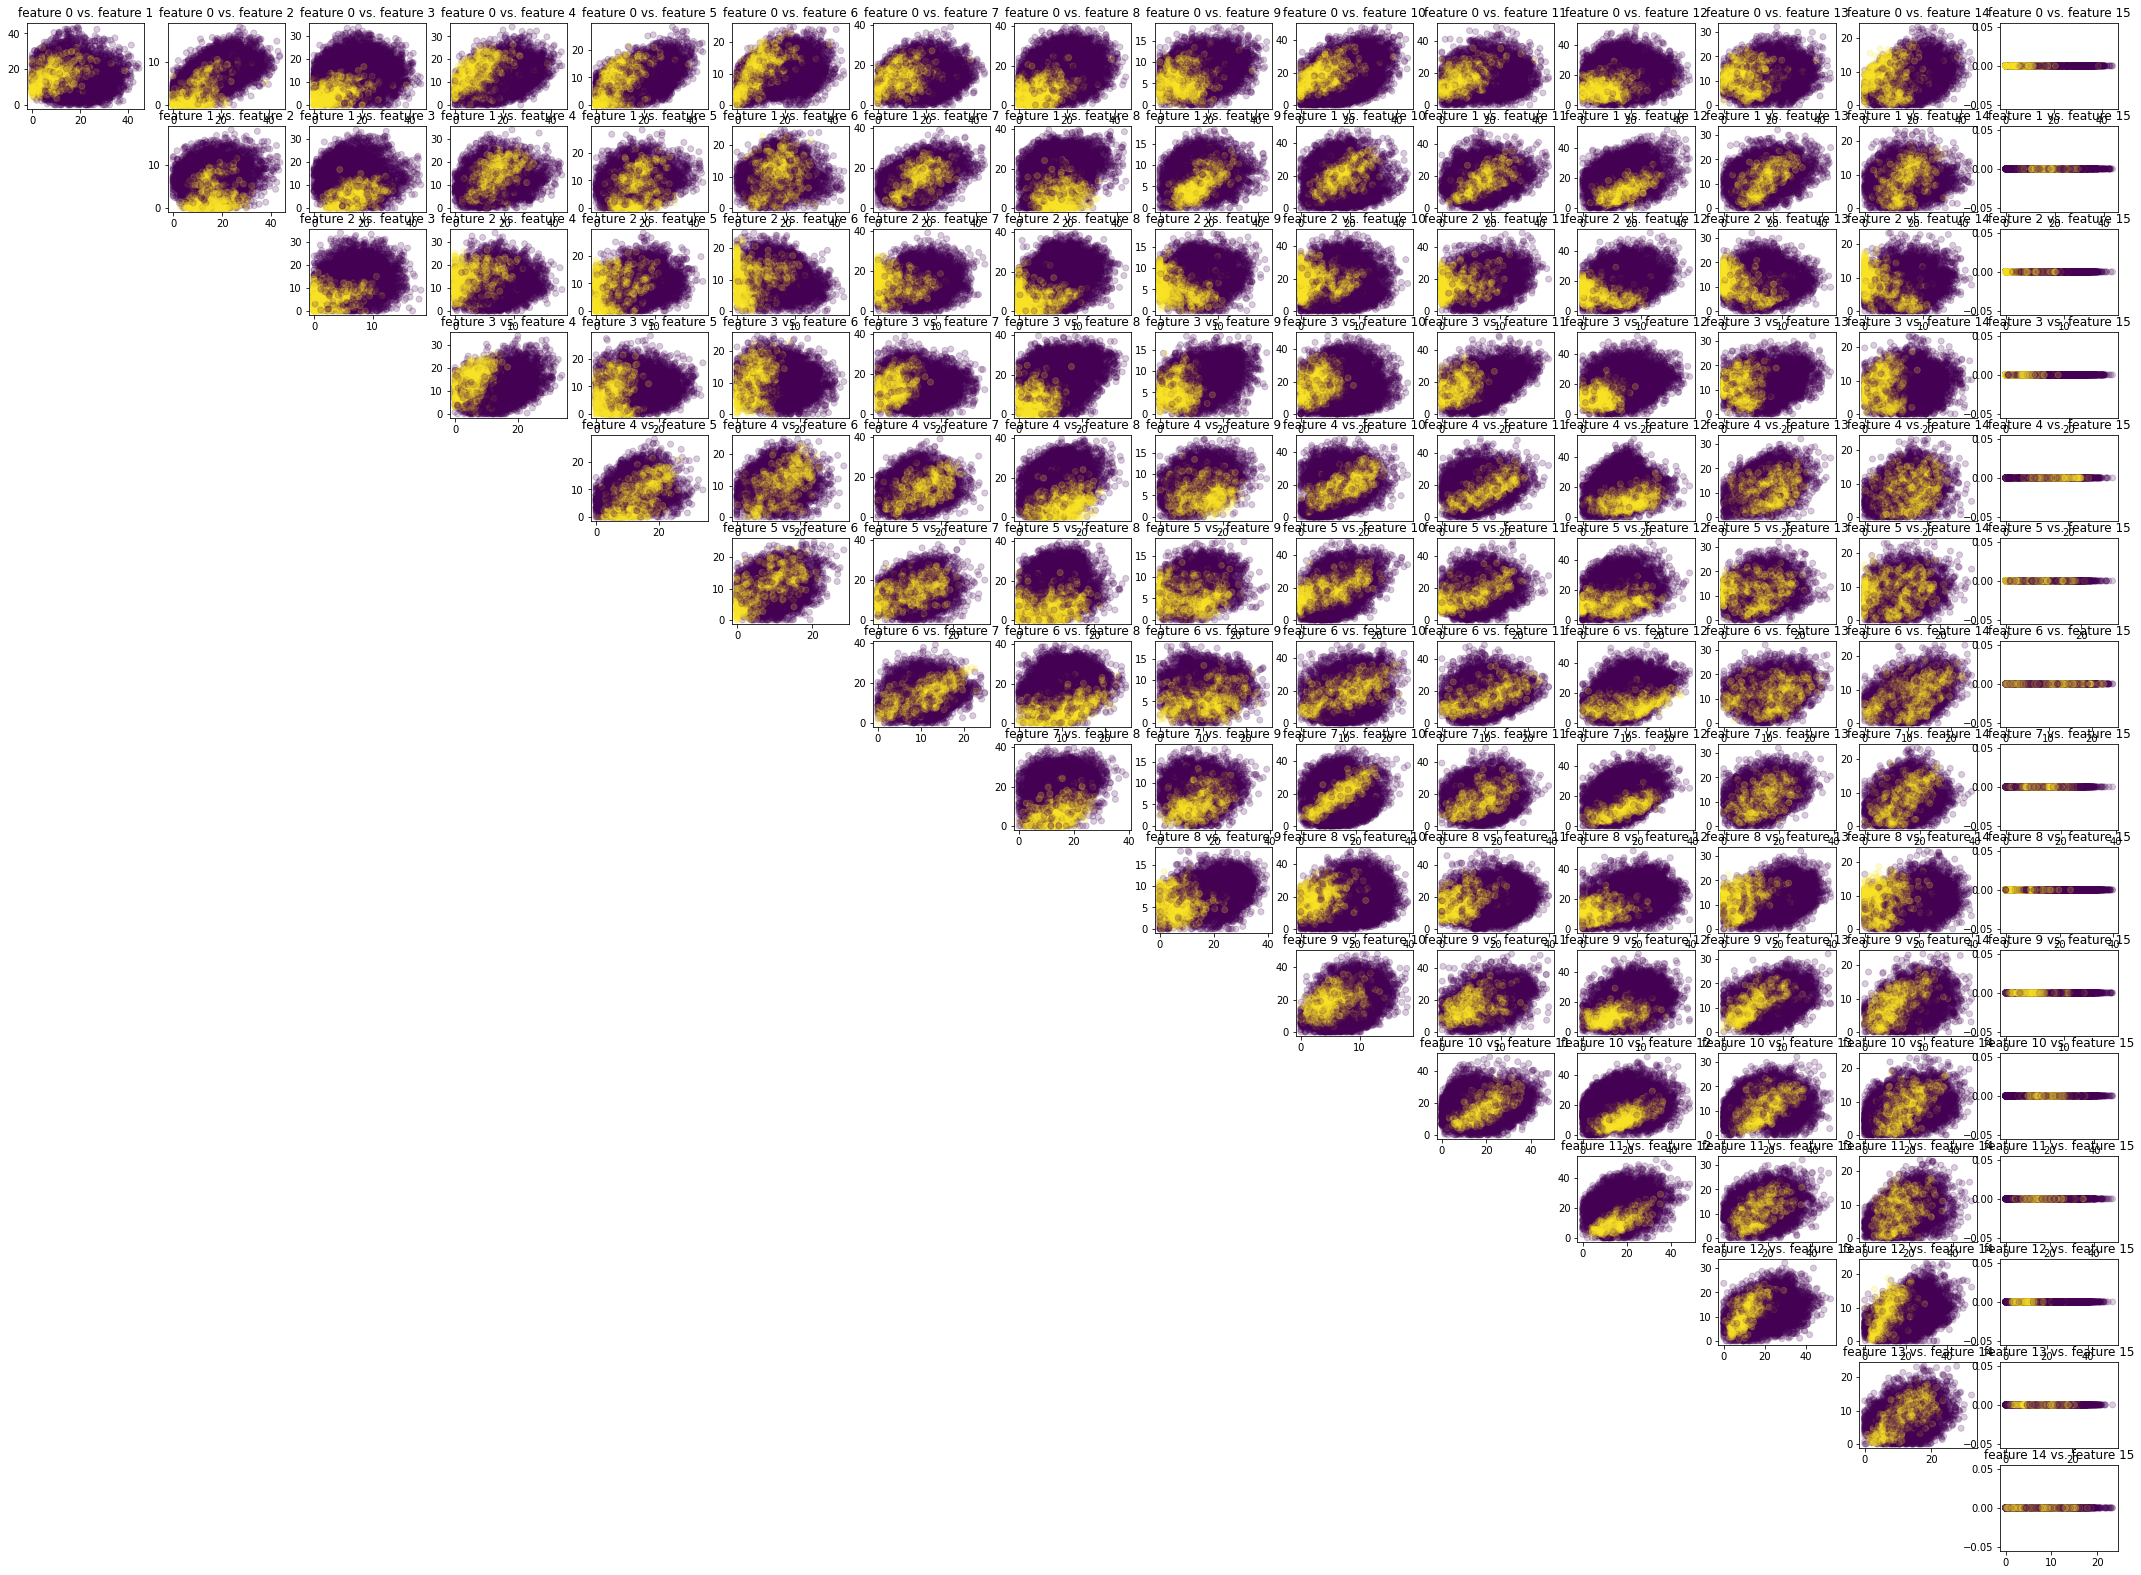

In [48]:
alldata = np.concatenate((x_train,x_test), axis=0)
alllabel = np.concatenate((y_train,y_test))
print(alldata.shape)
code = intermediate_layer_model.predict(alldata)
fig = plt.figure(figsize=(40,30)) 
gs = gridspec.GridSpec(code_size, code_size)
for i in range(code_size) :
  for j in range(i+1,code_size) :
    ax = plt.subplot(gs[i,j])
    ax.set_title("feature "+str(i)+" vs. feature "+str(j))
    ax.scatter(code[:, i], code[:, j], c=alllabel,alpha=0.2)
    fig.add_subplot(ax)
plt.show()


(7882, 784)


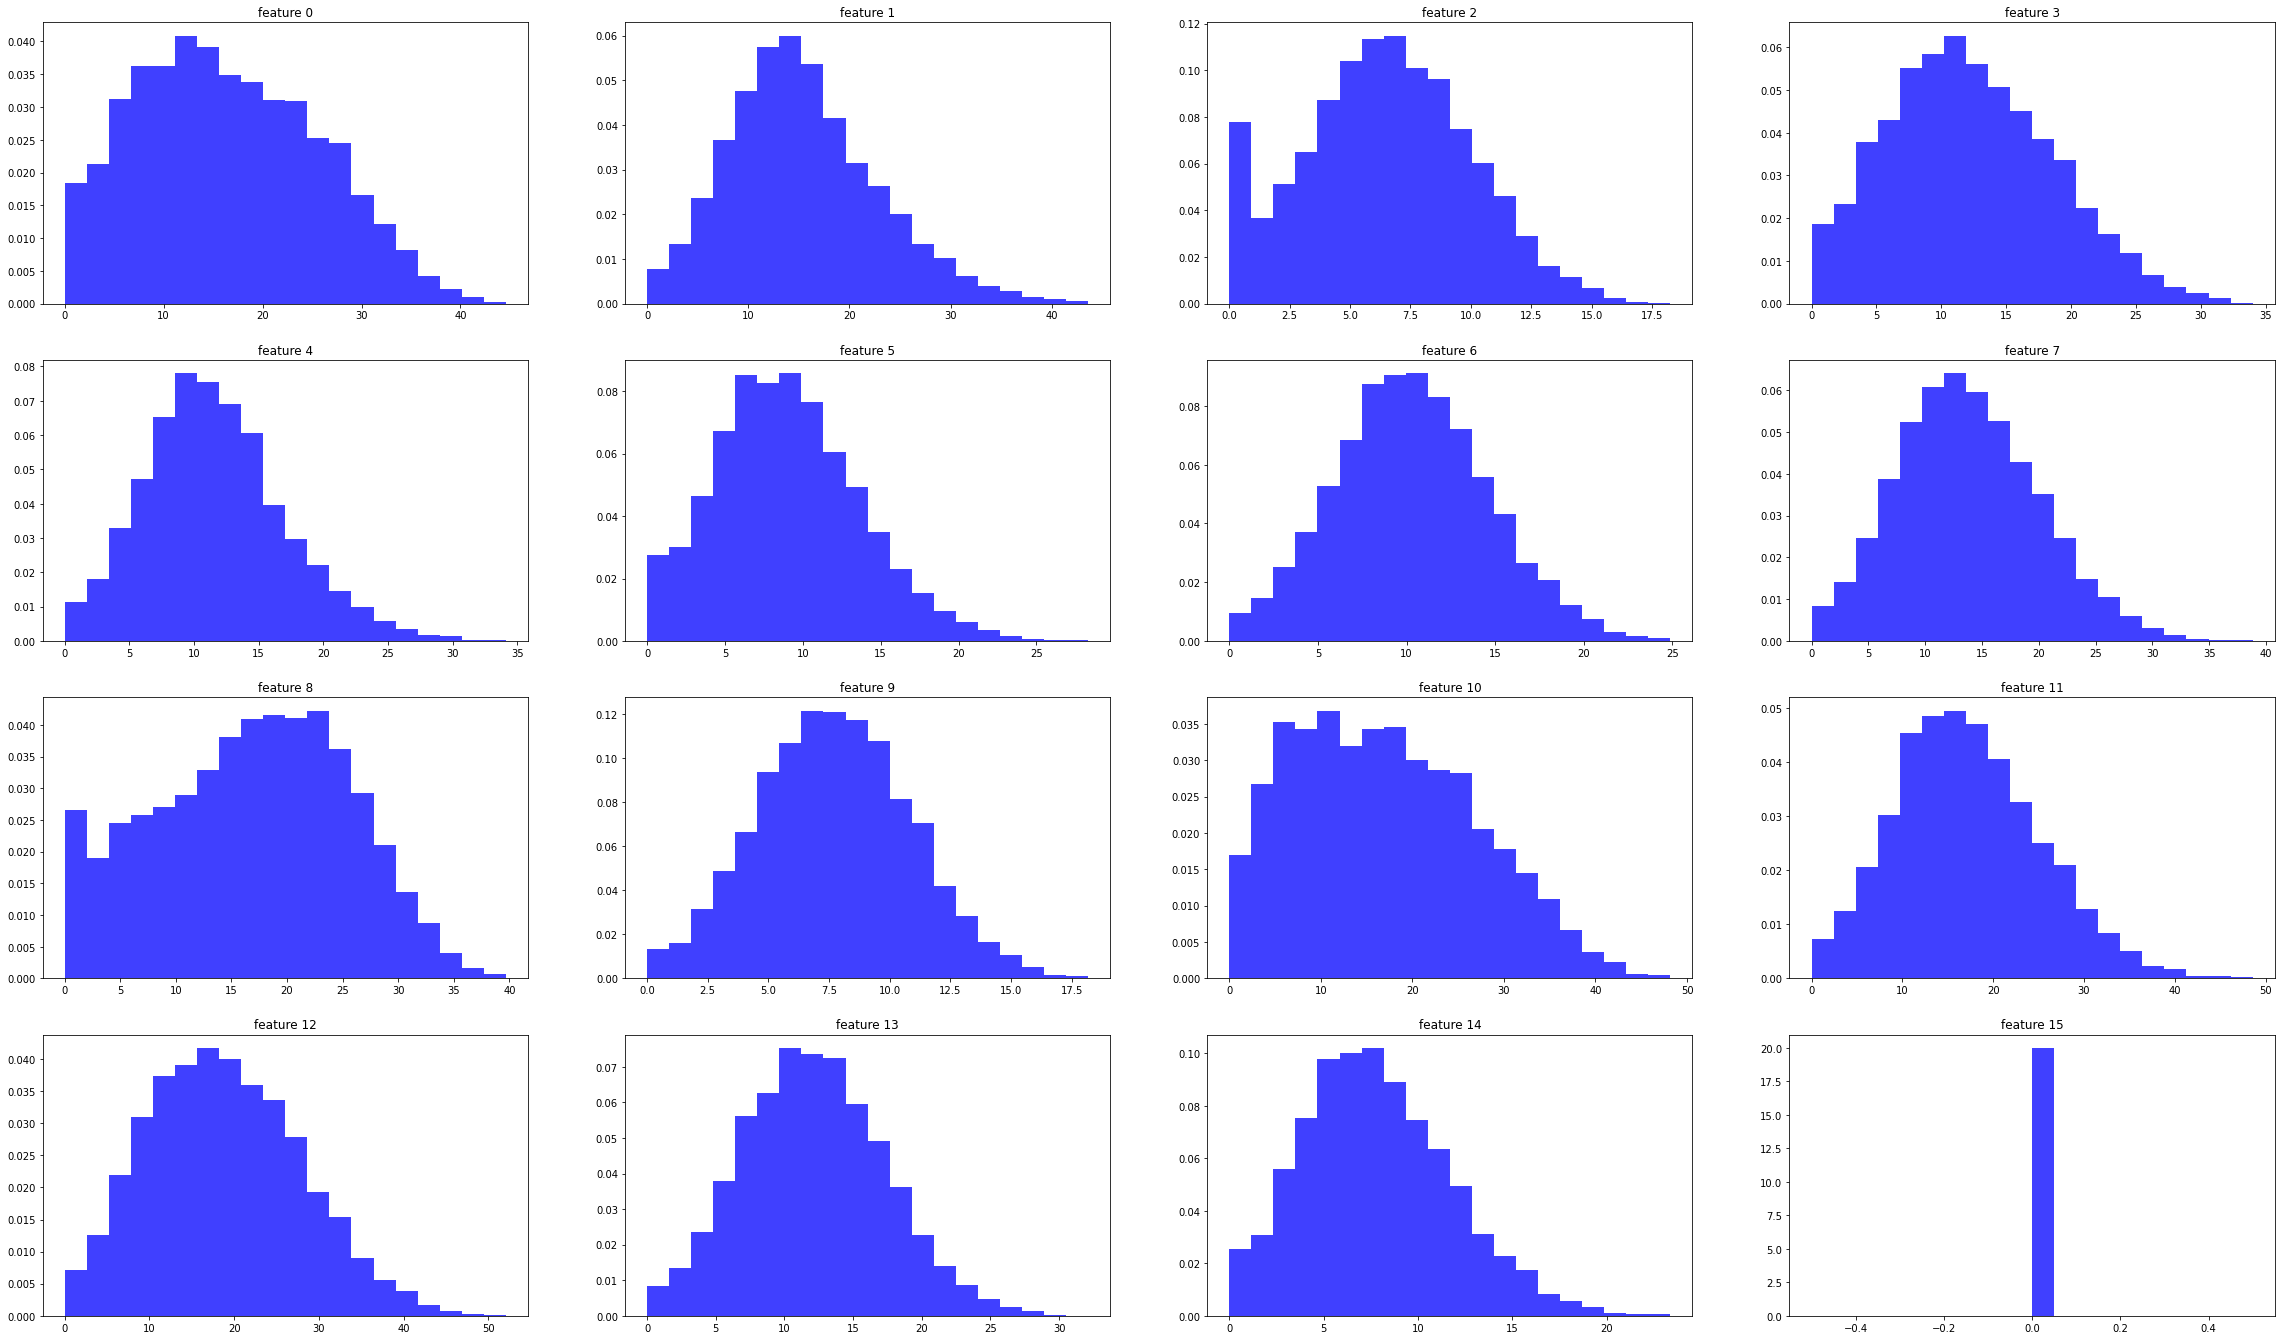

In [49]:

alldata = np.concatenate((x_train,x_test), axis=0)
alllabel = np.concatenate((y_train,y_test))
print(alldata.shape)
code = intermediate_layer_model.predict(alldata)
fig = plt.figure(figsize=(40,30)) 
gs = gridspec.GridSpec(int(code_size/4)+1, 4)
for i in range(code_size) :
    ax = plt.subplot(gs[int(i/4),i%4])
    ax.set_title("feature "+str(i))
    ax.hist(code[:, i], 20, density=True, facecolor='b', alpha=0.75)
    fig.add_subplot(ax)
plt.show()

# **Cifar10**

In [52]:

(X_train,Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],X_train.shape[2], X_train.shape[3])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],X_test.shape[3])
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
x_train = []
x_test = []
y_train = []
y_test = []
for i in range(len(Y_train)):
  if Y_train[i] == 2 :
    x_train.append(X_train[i])
    y_train.append(Y_train[i])
for i in range(len(Y_test)):
  if Y_test[i] == 2 or Y_test[i] == 5:
    x_test.append(X_test[i])
    y_test.append(Y_test[i])
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print((x_train.shape))

(50000, 32, 32, 3)
(5000, 3072)


3072
Epoch 1/30
40/40 [==============================] - 1s 16ms/step - loss: 0.0507 - val_loss: 0.0535
Epoch 2/30
40/40 [==============================] - 0s 9ms/step - loss: 0.0419 - val_loss: 0.0485
Epoch 3/30
40/40 [==============================] - 0s 9ms/step - loss: 0.0391 - val_loss: 0.0472
Epoch 4/30
40/40 [==============================] - 0s 10ms/step - loss: 0.0381 - val_loss: 0.0464
Epoch 5/30
40/40 [==============================] - 0s 9ms/step - loss: 0.0361 - val_loss: 0.0439
Epoch 6/30
40/40 [==============================] - 0s 9ms/step - loss: 0.0321 - val_loss: 0.0408
Epoch 7/30
40/40 [==============================] - 0s 9ms/step - loss: 0.0295 - val_loss: 0.0378
Epoch 8/30
40/40 [==============================] - 0s 9ms/step - loss: 0.0280 - val_loss: 0.0355
Epoch 9/30
40/40 [==============================] - 0s 10ms/step - loss: 0.0262 - val_loss: 0.0348
Epoch 10/30
40/40 [==============================] - 0s 9ms/step - loss: 0.0256 - val_loss: 0.0315
Epoch 11/30

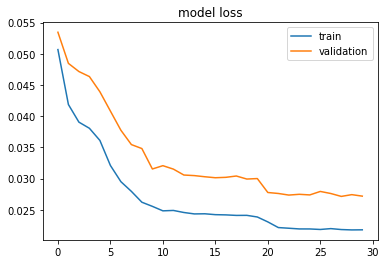

In [53]:
print(x_train.shape[1])
input_size = x_train.shape[1]
hidden_size = 256
code_size = 16
epochs = 30
batch_size = 128

x = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(x)
h = Dense(code_size,name = "code_layer",activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(h)
r = Dense(input_size, activation='sigmoid')(hidden_2)
# initialize
autoencoder = Model(inputs=x, outputs=r)
intermediate_layer_model = Model(inputs=autoencoder.input,outputs=autoencoder.get_layer('code_layer').output)
autoencoder.compile(optimizer='adam', loss='mse')
# plot
SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))
# train
history = autoencoder.fit(x_train, x_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, x_test))
# test
decoded_imgs = autoencoder.predict(x_test)
intermediate_output = intermediate_layer_model.predict(x_test)
print(intermediate_output.shape)
# loss
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()



plot histogram


(7000, 3072)


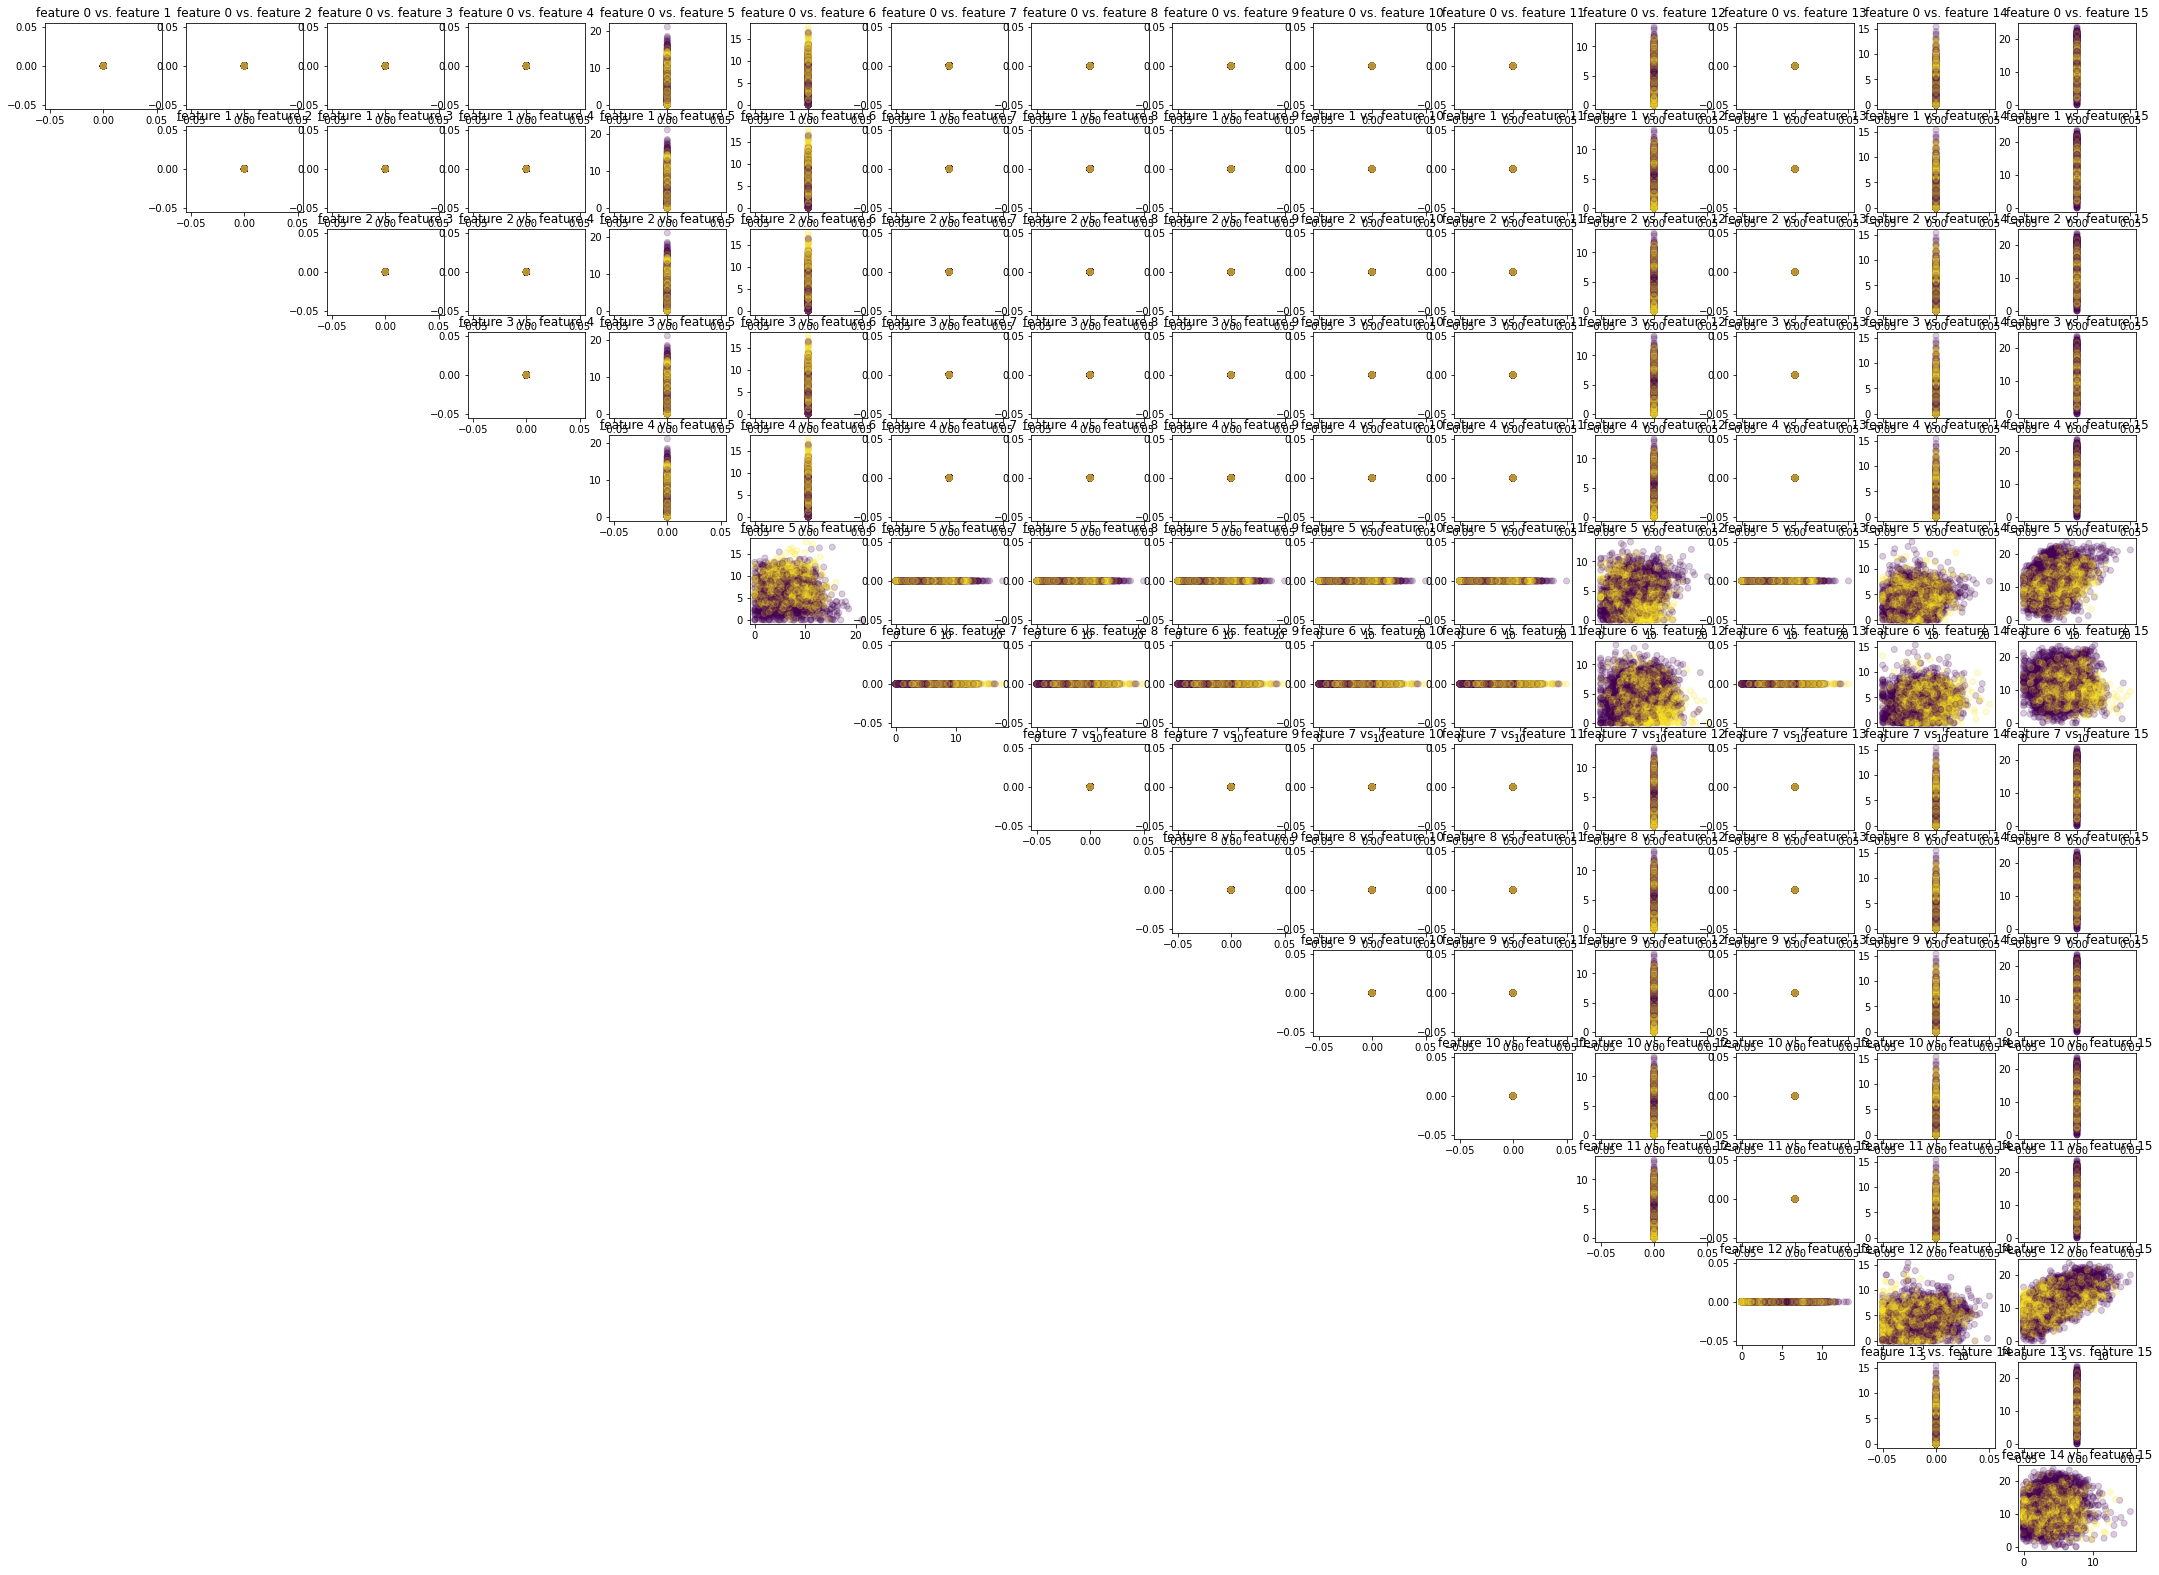

In [54]:
alldata = np.concatenate((x_train,x_test), axis=0)
alllabel = np.concatenate((y_train,y_test))
print(alldata.shape)
code = intermediate_layer_model.predict(alldata)
fig = plt.figure(figsize=(40,30)) 
gs = gridspec.GridSpec(code_size, code_size)
for i in range(code_size) :
  for j in range(i+1,code_size) :
    ax = plt.subplot(gs[i,j])
    ax.set_title("feature "+str(i)+" vs. feature "+str(j))
    ax.scatter(code[:, i], code[:, j], c=alllabel,alpha=0.2)
    fig.add_subplot(ax)
plt.show()


(7882, 784)


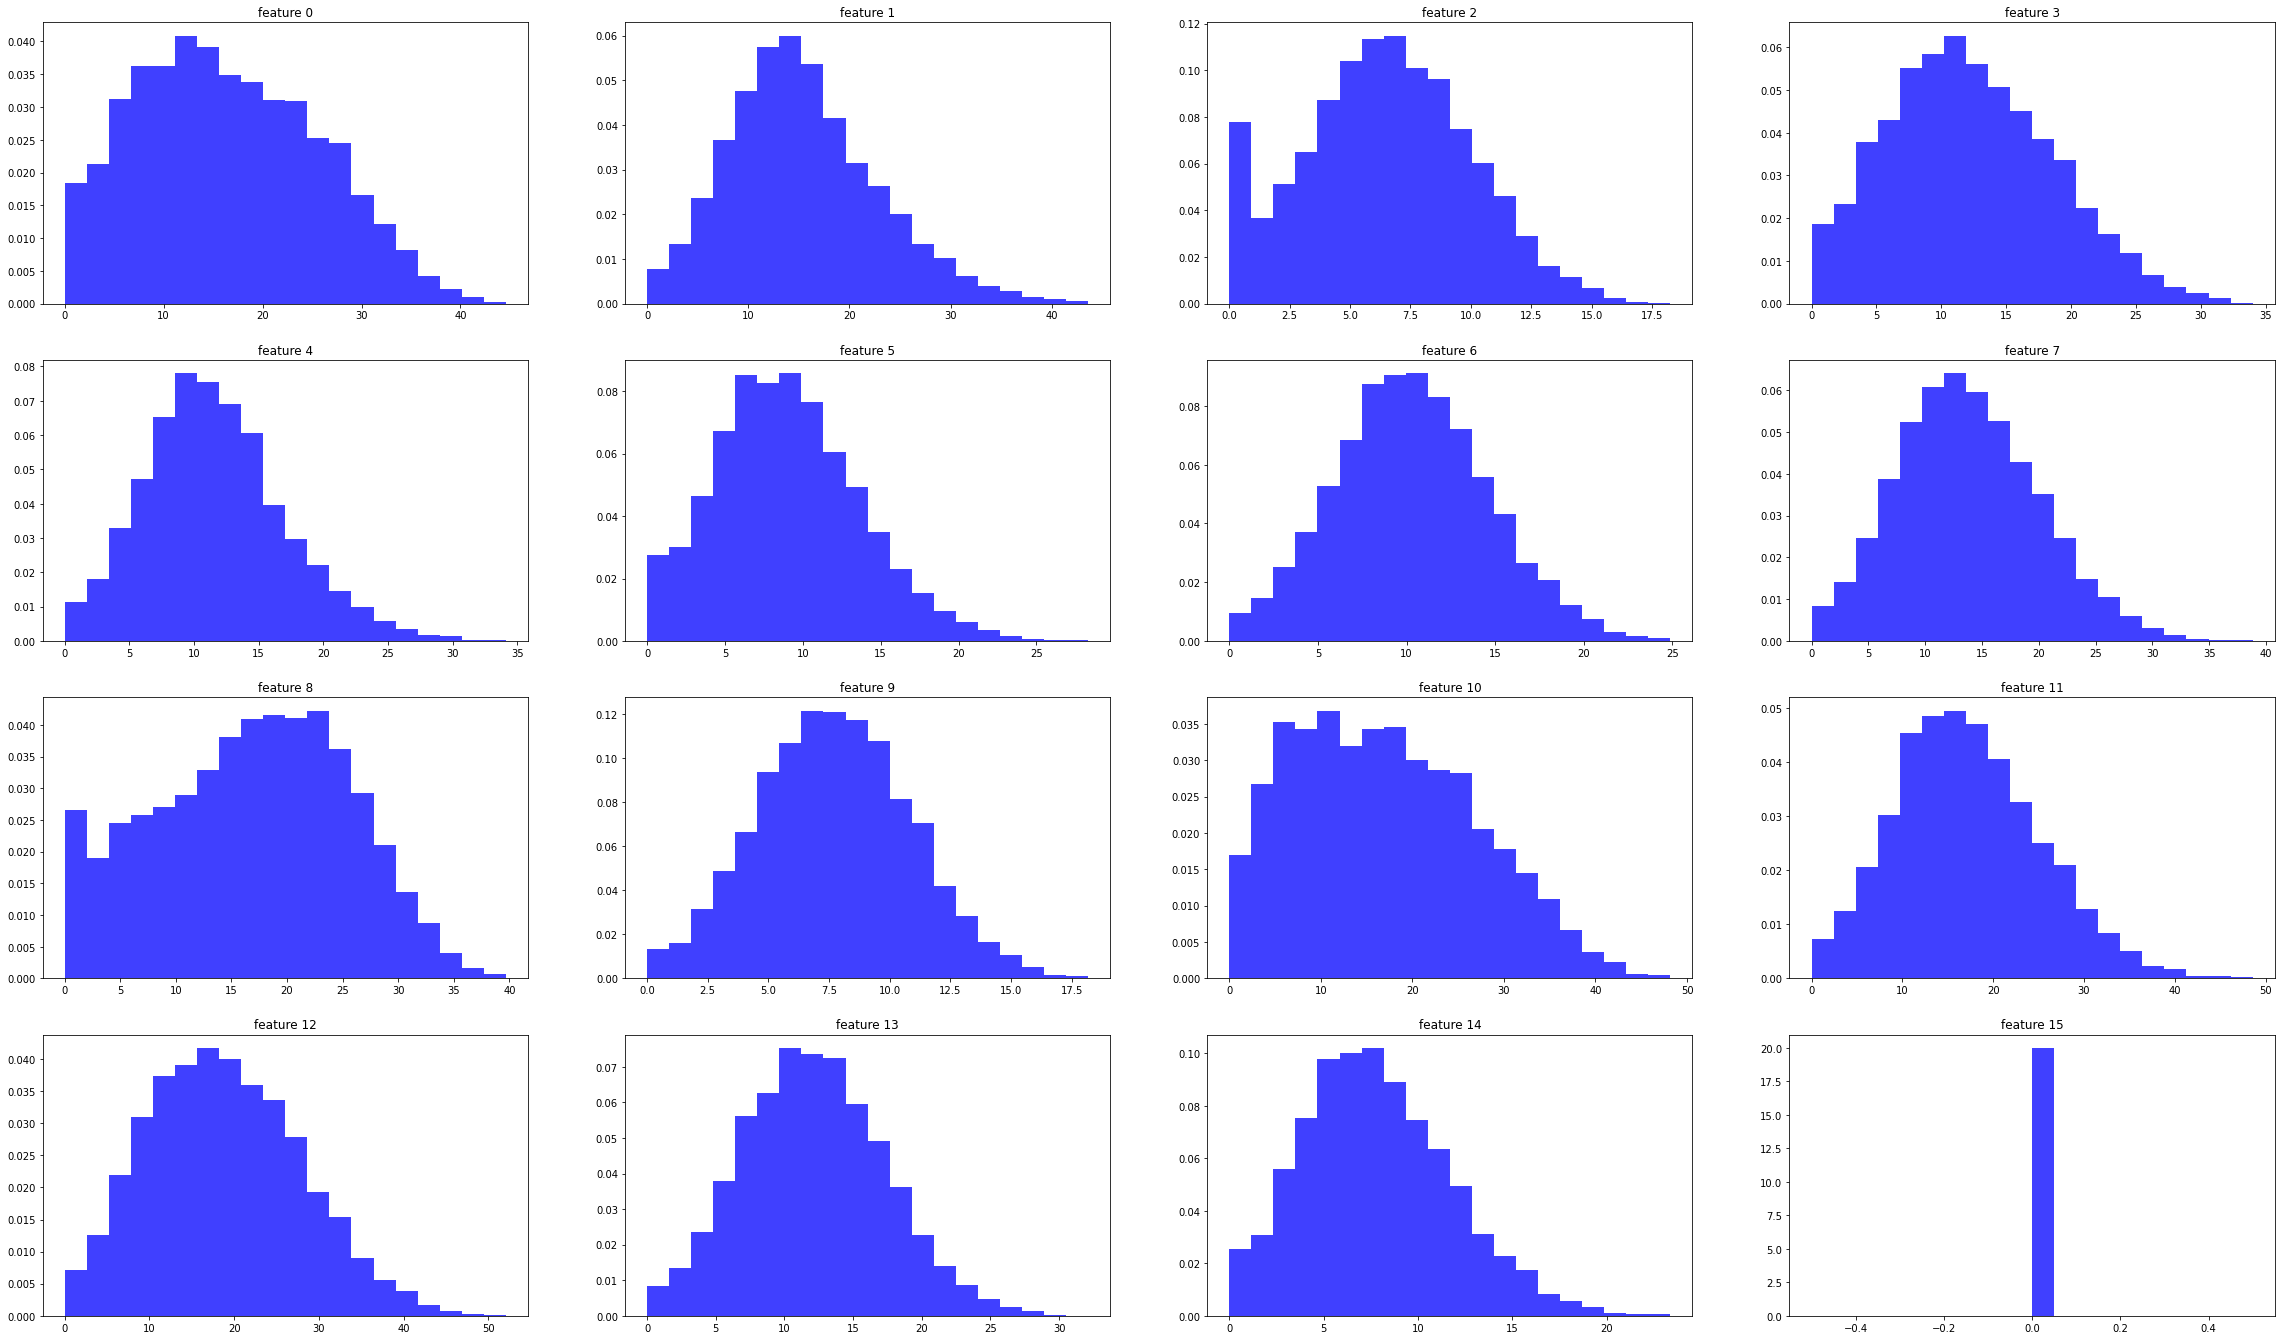

In [ ]:

alldata = np.concatenate((x_train,x_test), axis=0)
alllabel = np.concatenate((y_train,y_test))
print(alldata.shape)
code = intermediate_layer_model.predict(alldata)
fig = plt.figure(figsize=(40,30)) 
gs = gridspec.GridSpec(int(code_size/4)+1, 4)
for i in range(code_size) :
    ax = plt.subplot(gs[int(i/4),i%4])
    ax.set_title("feature "+str(i))
    ax.hist(code[:, i], 20, density=True, facecolor='b', alpha=0.75)
    fig.add_subplot(ax)
plt.show()